# Downloading data base

This notebook is created to access the 2019 Novel Coronavirus COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE, which can be found here: https://github.com/CSSEGISandData/COVID-19

Written by Bruno Abreu, April 2020
as part of the Racionalidade Cientifica initiative.

In [1]:
import sys
import os
import pandas as pd

In [2]:
global repo_path
repo_path = "/home/babreu/Science/covid19/repo"

In [3]:
def update_repo():
    """
    This should clone the data base to your working directory. Make sure to correct the file path, as well as 
    make sure to run this function before doing analysis so that you get all of the available data.
    """
    pull = "git pull https://github.com/CSSEGISandData/COVID-19.git"
    os.chdir(repo_path) 
    os.system(pull)



# Reading files: temporal series

In [4]:
def read_files_ts():
    """
    Function to read the CSV files with temporal series and place them into pandas dataframes. 
    It will return 3 data frames.
    """
    update_repo()
    
    file = repo_path + "/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv" 
    df_cases = pd.read_csv(file)
    
    file = repo_path + "/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv" 
    df_deaths = pd.read_csv(file)
    
    file = repo_path + "/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv" 
    df_recovs = pd.read_csv(file)
    
    return df_cases, df_deaths, df_recovs

In [5]:
df_c,df_d,df_r = read_files_ts()

In [6]:
df_c.sample(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20
15,Western Australia,Australia,-31.9505,115.8605,0,0,0,0,0,0,...,355,364,392,400,400,436,453,460,460,481
49,Anhui,China,31.8257,117.2264,1,9,15,39,60,70,...,990,990,990,990,990,990,990,990,990,990
19,NaN,Bahrain,26.0275,50.5500,0,0,0,0,0,0,...,515,567,569,643,672,688,700,756,811,823
90,NaN,Cyprus,35.1264,33.4299,0,0,0,0,0,0,...,230,262,320,356,396,426,446,465,494,526
100,NaN,Equatorial Guinea,1.5000,10.0000,0,0,0,0,0,0,...,12,12,15,15,16,16,16,16,16,18


## Cleaning data

In [7]:
from datetime import datetime      #having a nicer index format so graphs look cool

In [8]:
df_c = df_c.T                     #using transpose of data frame

df_c.fillna('',inplace=True)      #droping NaNs
 
x1 = []                            #putting together state and country                        
for i in range(df_c.shape[1]):
    if df_c.iloc[0][i] == '':
        y = df_c.iloc[1][i]
    else:
        y = df_c.iloc[0][i] + ', ' + df_c.iloc[1][i]
    x1.append(y)
    
df_c.columns = x1

df_c.drop(index=['Province/State','Country/Region','Lat', 'Long'],inplace=True)       #droping geography, keeping only dates
  

x2 = []                             #turning index into datetime format
for i in range(len(df_c.index)):
    y = df_c.index[i]
    z = datetime.strptime(y, '%m/%d/%y')
    x2.append(z)

df_c.index = x2

In [9]:
df_d = df_d.T
df_d.fillna('',inplace=True) 
x1 = []                     
for i in range(df_d.shape[1]):
    if df_d.iloc[0][i] == '':
        y = df_d.iloc[1][i]
    else:
        y = df_d.iloc[0][i] + ', ' + df_d.iloc[1][i]
    x1.append(y)
df_d.columns = x1
df_d.drop(index=['Province/State','Country/Region','Lat', 'Long'],inplace=True)
x2 = []
for i in range(len(df_d.index)):
    y = df_d.index[i]
    z = datetime.strptime(y, '%m/%d/%y')
    x2.append(z)
df_d.index = x2

In [10]:
df_r = df_r.T
df_r.fillna('',inplace=True) 
x1 = []                     
for i in range(df_r.shape[1]):
    if df_r.iloc[0][i] == '':
        y = df_r.iloc[1][i]
    else:
        y = df_r.iloc[0][i] + ', ' + df_r.iloc[1][i]
    x1.append(y)
df_r.columns = x1
df_r.drop(index=['Province/State','Country/Region','Lat', 'Long'],inplace=True)
x2 = []
for i in range(len(df_r.index)):
    y = df_r.index[i]
    z = datetime.strptime(y, '%m/%d/%y')
    x2.append(z)
df_r.index = x2

Now we have a way to look at specific countries/regions:

In [11]:
df_d['Brazil'].sample(5)

2020-03-23     34
2020-02-05      0
2020-02-02      0
2020-01-28      0
2020-04-01    240
Name: Brazil, dtype: object

### Separating by country, viz. disregarding regions --- TO DO

For local analysis it could be important to have data split into province/state, but for a global analysis that doesn't matter much. Plus, some countries are still not releasing that much granular data. So we could group these.

## Framing BRAZIL

In [12]:
brazil = pd.DataFrame(index=df_c.index)
brazil['Cases'] = df_c['Brazil']
brazil['Deaths'] = df_d['Brazil']
brazil['Recovered'] = df_r['Brazil']

In [13]:
brazil.sample(3)

,Cases,Deaths,Recovered
2020-04-06,12161,564,127
2020-02-15,0,0,0
2020-01-22,0,0,0


# Plotting

In [14]:
import matplotlib.pyplot as plt 
plt.show()

Text(0, 0.5, 'Number of cases')

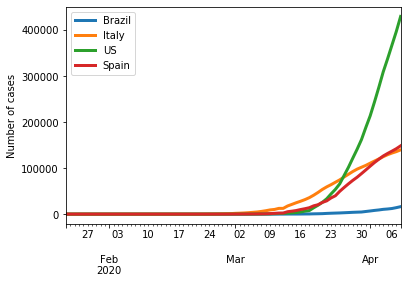

In [15]:
df_c[['Brazil','Italy', 'US','Spain']].plot(linewidth=3)
plt.ylabel('Number of cases') 

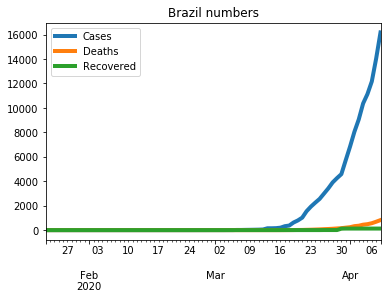

In [16]:
brazil.plot(kind='line',linewidth=4,title='Brazil numbers')

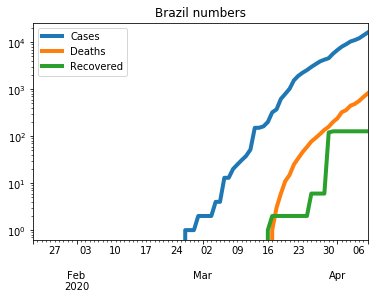

In [17]:
brazil.plot(kind='line',linewidth=4,logy=True,title='Brazil numbers')

# Reading files: daily data

In [18]:
def read_files_dd():
    """
    This function will read the daily reports files and return a double-indexed dataframe with the external
    layer representing the Country and the internal layer representing the date.
    """
    update_repo()

    # path to folder
    dd_path = repo_path + "/csse_covid_19_data/csse_covid_19_daily_reports"
    os.chdir(dd_path)
    filelist = os.listdir()

    # create list of files and with timestamps
    ind2 = []
    for file in filelist:
        if file[-3:] == 'csv':
            date = datetime.strptime(file.strip('.csv'), '%m-%d-%Y')
            ind2.append(date)
    ind2.sort()

    #remove unecessary files
    filelist.remove('README.md')
    filelist.remove('.gitignore')
    filelist.sort()

    # now we need to find all possible countries in these files
    # unfortunately this has been done in a non-consistent way by JHU
    countries_set = set()

    for file in filelist:
        df_temp = pd.read_csv(file)
        cols = []
        for col in list(df_temp.columns):
            cols.append(col.replace('/','_'))
        df_temp.columns = cols
        countries_set.update(list(df_temp['Country_Region']))

    # list of countries
    countries = list(countries_set)
    countries.sort()
    ind1 = countries

    #double index with product country*date
    iterables = [ind1,ind2]
    double_ind = pd.MultiIndex.from_product(iterables, names=['Country','Date'])

    # create double indexed dataframe filled with zeros
    df_dd = pd.DataFrame(index=double_ind,columns=['Confirmed','Deaths','Recovered']).fillna(0)

    # read files and update dataframe
    for counter,file in enumerate(filelist):
        df_temp = pd.read_csv(file)
        cols = []
        for col in list(df_temp.columns):
            cols.append(col.replace('/','_'))
        df_temp.columns = cols
        df_temp = df_temp.groupby(['Country_Region']).sum() 
        x = [list(df_temp.index),[ind2[counter]]]
        tr = pd.MultiIndex.from_product(x)
        df_temp.index = tr
        df_dd.loc[df_temp.index] = df_temp[['Confirmed','Deaths','Recovered']]
        
    return df_dd

Now we have a huge table with a double index: (Country, Date). This should be all we need.

In [19]:
df = read_files_dd()
df.sample(10)

,,Confirmed,Deaths,Recovered
Country,Date,,,
Maldives,2020-04-07,19.0,0.0,13.0
Indonesia,2020-03-23,579.0,49.0,30.0
Faroe Islands,2020-04-03,0.0,0.0,0.0
Diamond Princess,2020-02-17,0.0,0.0,0.0
Jordan,2020-03-31,274.0,5.0,30.0
Cape Verde,2020-03-20,0.0,0.0,0.0
Venezuela,2020-02-06,0.0,0.0,0.0
Qatar,2020-02-22,0.0,0.0,0.0
Gambia,2020-03-10,0.0,0.0,0.0


# Plotting

With this, we can access date on each level of the index. For example, for a specific country:

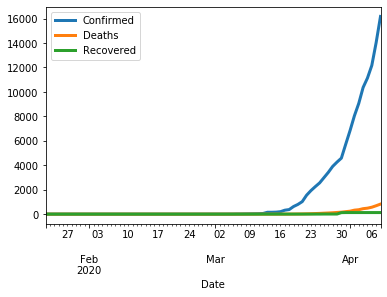

In [20]:
df.xs('Brazil',level='Country')[['Confirmed','Deaths','Recovered']].plot(linewidth=3)

Or for a specific date:

In [21]:
x = pd.Timestamp(year=2020,month=4,day=8)

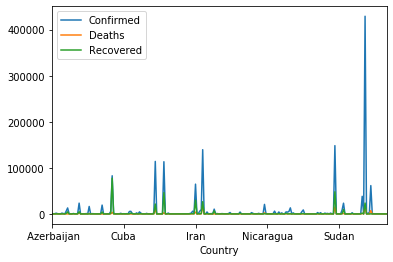

In [22]:
df.xs(x,level='Date').plot()

Here it is obvious that a geographical map would be ideal.

# Geographical data

In [23]:
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [24]:
wmap = gpd.read_file('/home/babreu/Science/covid19/world_borders/TM_WORLD_BORDERS-0.3.shp')

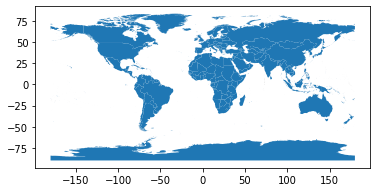

In [25]:
wmap.plot()

In [54]:
from geopy.geocoders import Nominatim
import numpy as np

In [73]:
def geolocate(country = None):
    """
    Returns lat/long coordinates of input country.
    """
    geolocator = Nominatim()
    try:
        loc = geolocator.geocode(country)
        return loc.latitude, loc.longitude
    except:
        return np.nan, np.nan

In [74]:
x = pd.Timestamp(year=2020,month=4,day=8)   # pick a date
tr = df.xs(x,level='Date')                  # slice dataframe for that date
countries = list(tr.index)                  # extract countries

In [96]:
# find coordinates
lats = []
longs = []
for country in countries:
    lat,long = geolocate(country)
    lats.append(lat)
    longs.append(long)

/home/babreu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Using Nominatim with the default "geopy/1.21.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  """


In [98]:
# incorporate it to sliced dataframe
tr['Latitude'] = lats
tr['Longitude'] = longs

/home/babreu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/babreu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [106]:
# create geo data frame with points in position
geometry = [Point(xy) for xy in zip(tr['Longitude'], tr['Latitude'])]

crs = {'init': 'epsg:4326'}
geo_df = gpd.GeoDataFrame(tr, crs = crs, geometry = geometry)

In [108]:
geo_df.head()

,Confirmed,Deaths,Recovered,Latitude,Longitude,geometry
Country,,,,,,
Azerbaijan,0.0,0.0,0.0,40.393629,47.787251,POINT (47.78725 40.39363)
Afghanistan,444.0,14.0,29.0,33.768006,66.238514,POINT (66.23851 33.76801)
Albania,400.0,22.0,154.0,41.000028,19.999962,POINT (19.99996 41.00003)
Algeria,1572.0,205.0,237.0,28.000027,2.999983,POINT (2.99998 28.00003)
Andorra,564.0,23.0,52.0,42.540717,1.573203,POINT (1.57320 42.54072)


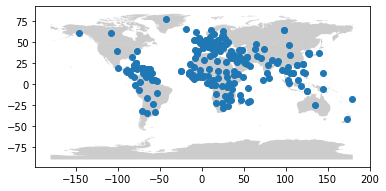

In [110]:
# plot 
fig, ax = plt.subplots()
wmap.plot(ax = ax, alpha=0.4, color='grey')
geo_df.plot(ax=ax)